<a href="https://colab.research.google.com/github/DrsimpleMugo/Apple-Leaf-Disease-Classification/blob/main/Apple_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import callbacks,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False )

In [ ]:
 for layer in inception.layers:
   layer.trainable = False

In [ ]:
folders = glob ('/content/drive/MyDrive/train/*')

In [ ]:
folders

['/content/drive/MyDrive/train/Cedar_apple_rust',
 '/content/drive/MyDrive/train/Healthy',
 '/content/drive/MyDrive/train/Black_rot',
 '/content/drive/MyDrive/train/Scab']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs = inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [ ]:
elst = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
save_ck = callbacks.ModelCheckpoint('/content/drive/MyDrive/apple.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2150 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 750 images belonging to 4 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data = test_set,
    #callbacks = [elst, save_ck],
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps=len(test_set) 
)

Epoch 1/50
68/68 [==============================] - 1788s 26s/step - loss: 2.1165 - accuracy: 0.7865 - val_loss: 0.5676 - val_accuracy: 0.9173
Epoch 2/50
68/68 [==============================] - 36s 532ms/step - loss: 0.3989 - accuracy: 0.9321 - val_loss: 0.4390 - val_accuracy: 0.9253
Epoch 3/50
68/68 [==============================] - 35s 521ms/step - loss: 0.2251 - accuracy: 0.9460 - val_loss: 0.2591 - val_accuracy: 0.9507
Epoch 4/50
68/68 [==============================] - 36s 526ms/step - loss: 0.4013 - accuracy: 0.9344 - val_loss: 0.2637 - val_accuracy: 0.9520
Epoch 5/50
68/68 [==============================] - 36s 531ms/step - loss: 0.1955 - accuracy: 0.9656 - val_loss: 0.2891 - val_accuracy: 0.9560
Epoch 6/50
68/68 [==============================] - 36s 527ms/step - loss: 0.1925 - accuracy: 0.9628 - val_loss: 0.2619 - val_accuracy: 0.9480
Epoch 7/50
68/68 [==============================] - 36s 531ms/step - loss: 0.1529 - accuracy: 0.9693 - val_loss: 0.3426 - val_accuracy: 0.9600

In [ ]:
import matplotlib.pyplot as plt

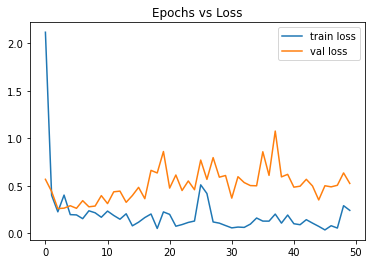

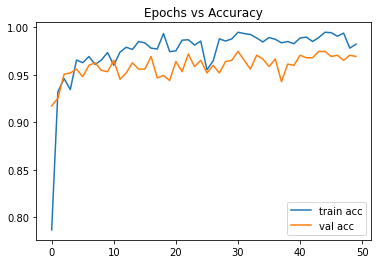

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title("Epochs vs Loss")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Epochs vs Accuracy")
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[7.3390138e-33, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.1369549e-27, 0.0000000e+00, 1.0000000e+00, 6.1807218e-28],
       [9.7806769e-34, 1.0000000e+00, 3.4120549e-36, 4.3521706e-26],
       ...,
       [2.9966022e-26, 9.4461621e-24, 1.0000000e+00, 6.7609234e-15],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.2799361e-38, 1.0000000e+00, 1.5326876e-34]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, 2, 1, 2, 2, 2, 3, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 3, 2, 2,
       2, 2, 2, 1, 3, 3, 0, 2, 2, 3, 1, 3, 3, 2, 1, 0, 3, 0, 3, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 3, 2, 3, 0, 2, 2, 0, 3, 0, 0, 3, 0, 3, 2,
       0, 2, 0, 3, 3, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 3, 2, 2, 0,
       2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       0, 3, 2, 1, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 3, 0, 3, 2, 1, 2, 0, 2, 0, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 1, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 3, 2, 0, 3, 0, 3, 3, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 3,
       2, 2, 2, 3, 2, 1, 2, 2, 0, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 3,
       3, 0, 2, 3, 1, 2, 3, 2, 3, 2, 0, 3, 3, 2, 2,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
model.save('/content/drive/MyDrive/Apple/Apple2.h5')

model = load_model('/content/drive/MyDrive/Apple/Apple2.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/train/Healthy/Apple_Healthy (1062).JPG', target_size = (224,224))

In [ ]:
arr_img = image.img_to_array(img)

In [ ]:
arr_img

array([[[ 77.,  78.,  99.],
        [ 79.,  80., 101.],
        [ 83.,  84., 105.],
        ...,
        [ 85.,  87., 108.],
        [ 85.,  87., 108.],
        [ 87.,  89., 110.]],

       [[ 81.,  82., 103.],
        [ 82.,  83., 104.],
        [ 85.,  86., 107.],
        ...,
        [ 83.,  85., 106.],
        [ 82.,  84., 105.],
        [ 82.,  84., 105.]],

       [[ 82.,  83., 104.],
        [ 81.,  82., 103.],
        [ 85.,  86., 107.],
        ...,
        [ 91.,  93., 114.],
        [ 92.,  94., 115.],
        [ 92.,  94., 115.]],

       ...,

       [[139., 144., 164.],
        [138., 143., 163.],
        [138., 143., 163.],
        ...,
        [168., 173., 193.],
        [167., 172., 192.],
        [167., 172., 192.]],

       [[137., 142., 162.],
        [137., 142., 162.],
        [137., 142., 162.],
        ...,
        [168., 173., 193.],
        [167., 172., 192.],
        [166., 171., 191.]],

       [[136., 141., 161.],
        [136., 141., 161.],
        [136., 1

In [ ]:
arr_img = arr_img/255

In [ ]:
arr_img = np.expand_dims(arr_img, axis = 0)
img_data = preprocess_input(arr_img)
img_data.shape

(1, 224, 224, 3)

In [ ]:
prediction = model.predict(img_data)

prediction

array([[2.5324621e-06, 9.9354422e-01, 6.1293077e-03, 3.2395721e-04]],
      dtype=float32)

In [ ]:
class_img = np.argmax(prediction, axis = 1)

class_img

array([1])